In [ ]:
import utility

utility.lj_potential(0.5,10)

In [ ]:
utility.pbc(43,10)

In [ ]:
import init
#parameters
rho = 0.01
Npart = 108
box_length = (Npart / rho) ** (1/3)
# print(box_length)
bond_length = 2.353  #angstrom

k = 30
temp = 300 #kelvin
beta = 1

debug = True
accepted_steps = 0

In [ ]:
positions = init.init_system(box_length, Npart)


In [ ]:
positions
import random
import numpy as np


In [ ]:
idx = random.randint(0,Npart-1)
idx

In [ ]:
prev_position = np.copy(positions[idx])
prev_position

In [ ]:
Wo1 = k * np.exp(-beta * utility.energy_of_particle(idx,0,positions,box_length))
Wo1

In [ ]:
Wo2 = np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length))
for i in range(k-1):
    r = utility.generate_random_unit_vector() * bond_length
    positions[idx][1] = positions[idx][0] + r
    Wo2 += np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length))
    
Wo = Wo1 * Wo2
print(Wo)

In [ ]:
positions[idx][0] = np.random.rand(3)* box_length
positions[idx][0]

In [ ]:
Wn1 =  k * np.exp(-beta * utility.energy_of_particle(idx,0,positions,box_length))
Wn1

In [ ]:
#select a random_chain
    global accepted_steps
    idx = random.randint(0,Npart-1)
    #find rosenbluth factor for previous configuration
    prev_position = np.copy(positions[idx])
    Wo1 = k * np.exp(-beta * utility.energy_of_particle(idx,0,positions,box_length))
    Wo2 = np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length))
    for i in range(k-1):
        r = utility.generate_random_unit_vector() * bond_length
        positions[idx][1] = positions[idx][0] + r
        Wo2 += np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length))
    
    Wo = Wo1 * Wo2
    #find rosenbluth factor for new configuration
    #choose a random postion for first atom
    positions[idx][0] = np.random.rand(3)* box_length
    Wn1 =  k * np.exp(-beta * utility.energy_of_particle(idx,0,positions,box_length))
    second_atom_pos = []
    Wn2 = []
    for i in range(k):
        r = utility.generate_random_unit_vector()* bond_length
        positions[idx][1] = positions[idx][0] + r
        second_atom_pos.append(positions[idx][1])
        Wn2.append(np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length)))

    Wn2_sum = sum(Wn2)

    #select a configuration i with probaility Wn2[i]/Wn2_sum
    cum_Wn2 = Wn2[0]
    r_Wn2_sum = random.random()*Wn2_sum
    i = 0
    while cum_Wn2 < r_Wn2_sum:
        i +=1
        cum_Wn2 += Wn2[i]
    print(i, Wn2[i])
    Wn = Wn1 * Wn2_sum
    #replace position of second atom with selected second atom configuration 
    positions[idx][1] = second_atom_pos[i]
    print(Wo, " ", Wn)
    if Wn < Wo and random.random() > Wn/Wo:
        #not accept
        positions[idx] = prev_position   
    else :
        accepted_steps += 1
        if debug:
            print("new move accepted")
    
    return 


In [ ]:
import init
import utility
import visualize
import random
import numpy as np

#parameters
rho = 0.01
Npart = 108
box_length = (Npart / rho) ** (1/3)
# print(box_length)
bond_length = 2.353  #angstrom

k = 30
temp = 300 #kelvin
beta = 1

debug = True
accepted_steps = 0

positions = init.init_system(box_length, Npart)

def check(positions):
    for pos in positions:
        if np.linalg.norm(pos[0] - pos[1]) > bond_length + 0.01:
            return False
    
    return True

def get_minimum_distance(positions, idx1, idx2):
    min_len = 1000
    for i in range(len(positions)):
        if idx1 !=i:
            for pos in positions[i]:
                min_len = min(min_len, utility.pbc(np.linalg.norm(pos - positions[idx1][idx2]),box_length))
    
    return min_len

def CBMC_step(positions, Npart):
    #select a random_chain
    global accepted_steps
    idx = random.randint(0,Npart-1)
    #find rosenbluth factor for previous configuration
    prev_position = np.copy(positions[idx])
    Wo1 = k * np.exp(-beta * utility.energy_of_particle(idx,0,positions,box_length))
    Wo2 = np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length))
    for i in range(k-1):
        r = utility.generate_random_unit_vector() * bond_length
        positions[idx][1] = positions[idx][0] + r
        Wo2 += np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length))
    # print("Wo2" ,Wo2)
    Wo = Wo1 * Wo2
    #find rosenbluth factor for new configuration
    #choose a random postion for first atom
    positions[idx][0] = np.random.rand(3)* box_length
    Wn1 =  k * np.exp(-beta * utility.energy_of_particle(idx,0,positions,box_length))
    second_atom_pos = []
    Wn2 = []
    for i in range(k):
        r = utility.generate_random_unit_vector()* bond_length
        positions[idx][1] = positions[idx][0] + r
        second_atom_pos.append(positions[idx][1])
        Wn2.append(np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length)))
        # if get_minimum_distance(positions,idx,1) <1 and np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length)) >1:
            # print(Wn2[i],np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length)) )

    Wn2_sum = sum(Wn2)
    # print(Wn2_sum)
    #select a configuration i with probaility Wn2[i]/Wn2_sum
    cum_Wn2 = Wn2[0]
    r_Wn2_sum = random.random()*Wn2_sum
    i = 0
    while cum_Wn2 < r_Wn2_sum:
        i +=1
        cum_Wn2 += Wn2[i]
    # print(i, Wn2[i])
    Wn = Wn1 * Wn2_sum
    #replace position of second atom with selected second atom configuration 
    positions[idx][1] = second_atom_pos[i]
    # print(Wo, " ", Wn)
    if Wn < Wo and random.random() > Wn/Wo:
        #not accept
        positions[idx] = prev_position   
    else :
        accepted_steps += 1
        if debug:
            print("new move accepted")
            print(Wn2[i], Wn1,Wn2[i]/Wn2_sum, get_minimum_distance(positions,idx,0),get_minimum_distance(positions,idx,1))
            if get_minimum_distance(positions,idx,1) < 1:
                print(np.exp(-1*utility.energy_of_particle(idx,1,positions,box_length)))
                # print(Wn2)
                
                # return True
    
    return False

total_energy_sum = 0

for i in range(100):
    # visualize.visualize(positions)
    energy = utility.total_energy(positions,box_length)
    # print(energy)
    total_energy_sum += energy
    if CBMC_step(positions,Npart) == True:
        break


print(f"avg_energy {total_energy_sum / 100}")
print(f"Acceptance percentage {accepted_steps/1}")
visualize.visualize(positions)


In [ ]:
a = [5,3,2,1,4]
b = sum(a)
b
a[1]

In [ ]:

global accepted_steps
idx = random.randint(0,Npart-1)
#find rosenbluth factor for previous configuration
prev_position = np.copy(positions[idx])
Wo1 = k * np.exp(-beta * utility.energy_of_particle(idx,0,positions,box_length))
Wo2 = np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length))
for i in range(k-1):
    r = utility.generate_random_unit_vector() * bond_length
    positions[idx][1] = positions[idx][0] + r
    Wo2 += np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length))
# print("Wo2" ,Wo2)
Wo = Wo1 * Wo2
#find rosenbluth factor for new configuration
#choose a random postion for first atom
positions[idx][0] = np.random.rand(3)* box_length
Wn1 =  k * np.exp(-beta * utility.energy_of_particle(idx,0,positions,box_length))
second_atom_pos = []
Wn2 = []
for i in range(k):
    r = utility.generate_random_unit_vector()* bond_length
    positions[idx][1] = positions[idx][0] + r
    second_atom_pos.append(positions[idx][1])
    Wn2.append(np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length)))
    # if get_minimum_distance(positions,idx,1) <1 and np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length)) >1:
        # print(Wn2[i],np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length)) )

Wn2_sum = sum(Wn2)
# print(Wn2_sum)
#select a configuration i with probaility Wn2[i]/Wn2_sum
cum_Wn2 = Wn2[0]
r_Wn2_sum = random.random()*Wn2_sum
i = 0
while cum_Wn2 < r_Wn2_sum:
    i +=1
    cum_Wn2 += Wn2[i]
# print(i, Wn2[i])
Wn = Wn1 * Wn2_sum
#replace position of second atom with selected second atom configuration 
positions[idx][1] = second_atom_pos[i]
# print(Wo, " ", Wn)
if Wn < Wo and random.random() > Wn/Wo:
    #not accept
    positions[idx] = prev_position   
else :
    accepted_steps += 1
    if debug:
        print("new move accepted")
        print(Wn2[i], Wn1,Wn2[i]/Wn2_sum, get_minimum_distance(positions,idx,0),get_minimum_distance(positions,idx,1))
        if get_minimum_distance(positions,idx,1) < 1:
            print(np.exp(-1*utility.energy_of_particle(idx,1,positions,box_length)))
            # print(Wn2)
            
            # return True

In [ ]:
a= np.array((3,1))
c = []
for i in range(10):
    a +=1
    c.append(a)
print(c)

In [ ]:
import visualize

visualize.plot_energy_from_file("energy.txt")

In [ ]:
import matplotlib.pyplot as plt
with open("energy.txt",'r') as f:
    energy = [float(line.strip()) for line in f]
    steps = [ int(100 * i) for i in range(len(energy))]
    plt.plot(steps, energy)
    plt.ylabel("Energy (KbT)")
    plt.xlabel("Number of steps")
    plt.grid()
    plt.show()

In [ ]:
np_positions = np.load('positions.npy', allow_pickle=True)


In [ ]:
positions = []
for mol_pos in np_positions:
    positions.append([mol_pos[0],mol_pos[1]])

In [ ]:
utility.total_energy(positions,box_length)

In [ ]:
import init
from config import *
import utility
positions = init.init_system(box_length,Npart)

In [ ]:
len(positions)

In [ ]:
import visualize, utility
visualize.visualize(positions)
utility.total_energy(positions,box_length)

In [ ]:
from ethane_cbmc import *
# from tempfile import TemporaryFile
# position_file = TemporaryFile()

# positions = init.init_system(box_length, Npart)
# positions = utility.read_positions_from_file("positions.npy")

# energy_file = open("energy.txt",'a' )

for i in range(nsteps):
    # visualize.visualize(positions)
    energy = utility.total_energy(positions,box_length)
    print(f"Energy of the system at step {i} is: {energy}")
    # if i%write_interval == 0:
        # energy_file.write(str(energy)+"\n")
    positions = CBMC_step(positions,Npart)

# np.save('positions.npy', np.array(positions, dtype=object), allow_pickle=True)


In [ ]:
positions_list = [init.init_system(box_length,Npart),init.init_system(box_length,Npart)]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

def animate(i):
    # fig = plt.figure()
    ax.cla()
    positions = positions_list[i]
    for pos in positions:
        ax.plot([pos[0][0],pos[1][0]],[pos[0][1],pos[1][1]],
        [pos[0][2],pos[1][2]], 'g')
        ax.scatter3D([pos[0][0]],[pos[0][1]], [pos[0][2]], color = 'red')
        ax.scatter3D([pos[1][0]],[pos[1][1]], [pos[1][2]], color = 'blue')
    

num_plots = (len(positions_list))
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection='3d')
ani = FuncAnimation(fig, animate, frames=num_plots, interval=200)

writer = PillowWriter(fps=1)
ani.save('plots.gif', writer=writer)


In [ ]:
import init
import visualize
import utility
import numpy as np
with open('nvt.gro','r') as f:
    lines = [line for line in f]
    positions = []
    for i in range(Npart):
        l1 = lines[2*i+2].split()
        l2 = lines[2*i+3].split()
        mol_pos_1 = np.array([l1[3],l1[4],l1[5]]).astype(float)
        mol_pos_2 = np.array([l2[3],l2[4],l2[5]]).astype(float)
        positions.append([mol_pos_1,mol_pos_2])

positions

In [ ]:
lines

In [ ]:
from config import *
visualize.visualize(positions)

In [ ]:
utility.total_energy(positions,2.2)

In [ ]:
import init
import visualize
import utility
import numpy as np
positions = utility.read_positions_from_gromacs_file('nvt.gro')

In [ ]:
positions

In [ ]:
dx, dy, dz = positions[0][0] - positions[0][1]

In [ ]:
dx

In [ ]:
positions[0][0]

In [ ]:
positions[0][1]

In [ ]:
from config import *
utility.total_energy(positions,box_length)

In [1]:
import init
from utility import generate_random_unit_vector
import numpy as np
from config import *
import random


In [3]:
positions = init.init_system(box_length,108)

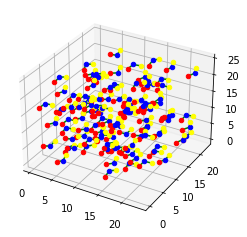

In [4]:
import visualize
visualize.visualize_propane(positions)

In [5]:
len(positions)

108

In [2]:
# r1,r2 = init.generate_random_molecule(1.5)
r1 = np.array([0,0,0])
r2 = np.array([1.5,0,0])

In [3]:
mol_pos = [r1,r2]

In [4]:
def add_bond(mol_pos, beta = 1):
    r = mol_pos[-2] - mol_pos[-1]
    r = r / np.linalg.norm(r)
    print(r)
    flag = False
    while flag == False:
        r_new = generate_random_unit_vector()
        theta = np.arccos(np.dot(r,r_new))
        
        energy = 0.5*k_prop*(theta- theta_mean)**2
        if theta > 1.5:
            print(theta)
            print("energy" ,energy)
        
        if random.random() < np.exp(-beta*energy):
            r_new  = r_new *  bond_length + mol_pos[-1]
            flag = True
            return r_new
    


In [5]:
r3 = add_bond(mol_pos)

[-1.  0.  0.]
1.9483689305321144
energy 0.01621698690587683


In [6]:
mol_pos.append(r3)


In [7]:
mol_pos

[array([0, 0, 0]),
 array([1.5, 0. , 0. ]),
 array([2.05299771, 0.04657219, 1.39356541])]

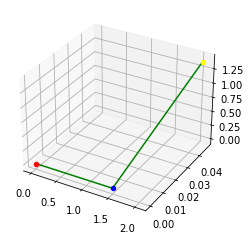

In [9]:
positions = [mol_pos]
import visualize
visualize.visualize_propane(positions)

1.5000000000000002